In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE 
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv(r"C:\Users\kanis\Downloads\dataset (4).csv")

In [4]:
df.head()

,Score,Text
0,4.0,"It is a nice made necklace, and the butterfly ..."
1,4.0,I bought this necklace on a whim; I love butte...
2,5.0,"Bought via gold box ,it is much better than I ..."
3,NaN,I love this necklace. It is great for everyday...
4,5.0,"Love this butterfly pendant. Right size, high ..."


In [5]:
# Check the distribution of ratings
rating_counts = df['Score'].value_counts()
print("Distribution of Ratings:\n", rating_counts)


Distribution of Ratings:
 Score
5.0    31888
4.0    10242
3.0     5129
1.0     4405
2.0     3283
Name: count, dtype: int64


In [24]:
# Handle missing values
df['Text_processed'] = df['Text'].fillna('')

In [25]:
# Convert to lowercase
df['Text_lower'] = df['Text_processed'].str.lower()

In [26]:
# Remove punctuation
df['Text_no_punct'] = df['Text_lower'].str.translate(str.maketrans('', '', string.punctuation))

In [27]:
# Tokenize
df['Text_tokenized'] = df['Text_no_punct'].apply(word_tokenize)
df.head()

,Score,Text,Text_processed,Text_lower,Text_no_punct,Text_tokenized
0,4.0,"It is a nice made necklace, and the butterfly ...","It is a nice made necklace, and the butterfly ...","it is a nice made necklace, and the butterfly ...",it is a nice made necklace and the butterfly p...,"[it, is, a, nice, made, necklace, and, the, bu..."
1,4.0,I bought this necklace on a whim; I love butte...,I bought this necklace on a whim; I love butte...,i bought this necklace on a whim; i love butte...,i bought this necklace on a whim i love butter...,"[i, bought, this, necklace, on, a, whim, i, lo..."
2,5.0,"Bought via gold box ,it is much better than I ...","Bought via gold box ,it is much better than I ...","bought via gold box ,it is much better than i ...",bought via gold box it is much better than i t...,"[bought, via, gold, box, it, is, much, better,..."
3,NaN,I love this necklace. It is great for everyday...,I love this necklace. It is great for everyday...,i love this necklace. it is great for everyday...,i love this necklace it is great for everyday ...,"[i, love, this, necklace, it, is, great, for, ..."
4,5.0,"Love this butterfly pendant. Right size, high ...","Love this butterfly pendant. Right size, high ...","love this butterfly pendant. right size, high ...",love this butterfly pendant right size high qu...,"[love, this, butterfly, pendant, right, size, ..."


In [28]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Text_no_stopwords'] = df['Text_tokenized'].apply(lambda words: [word for word in words if word not in stop_words])
df.head()

,Score,Text,Text_processed,Text_lower,Text_no_punct,Text_tokenized,Text_no_stopwords
0,4.0,"It is a nice made necklace, and the butterfly ...","It is a nice made necklace, and the butterfly ...","it is a nice made necklace, and the butterfly ...",it is a nice made necklace and the butterfly p...,"[it, is, a, nice, made, necklace, and, the, bu...","[nice, made, necklace, butterfly, pendant, loo..."
1,4.0,I bought this necklace on a whim; I love butte...,I bought this necklace on a whim; I love butte...,i bought this necklace on a whim; i love butte...,i bought this necklace on a whim i love butter...,"[i, bought, this, necklace, on, a, whim, i, lo...","[bought, necklace, whim, love, butterflies, lo..."
2,5.0,"Bought via gold box ,it is much better than I ...","Bought via gold box ,it is much better than I ...","bought via gold box ,it is much better than i ...",bought via gold box it is much better than i t...,"[bought, via, gold, box, it, is, much, better,...","[bought, via, gold, box, much, better, thought..."
3,NaN,I love this necklace. It is great for everyday...,I love this necklace. It is great for everyday...,i love this necklace. it is great for everyday...,i love this necklace it is great for everyday ...,"[i, love, this, necklace, it, is, great, for, ...","[love, necklace, great, everyday, wear, durabl..."
4,5.0,"Love this butterfly pendant. Right size, high ...","Love this butterfly pendant. Right size, high ...","love this butterfly pendant. right size, high ...",love this butterfly pendant right size high qu...,"[love, this, butterfly, pendant, right, size, ...","[love, butterfly, pendant, right, size, high, ..."


In [29]:
# Lemmatize
lemmatizer = WordNetLemmatizer()
df['Text_lemmatized'] = df['Text_no_stopwords'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])
df.head()

,Score,Text,Text_processed,Text_lower,Text_no_punct,Text_tokenized,Text_no_stopwords,Text_lemmatized
0,4.0,"It is a nice made necklace, and the butterfly ...","It is a nice made necklace, and the butterfly ...","it is a nice made necklace, and the butterfly ...",it is a nice made necklace and the butterfly p...,"[it, is, a, nice, made, necklace, and, the, bu...","[nice, made, necklace, butterfly, pendant, loo...","[nice, made, necklace, butterfly, pendant, loo..."
1,4.0,I bought this necklace on a whim; I love butte...,I bought this necklace on a whim; I love butte...,i bought this necklace on a whim; i love butte...,i bought this necklace on a whim i love butter...,"[i, bought, this, necklace, on, a, whim, i, lo...","[bought, necklace, whim, love, butterflies, lo...","[bought, necklace, whim, love, butterfly, look..."
2,5.0,"Bought via gold box ,it is much better than I ...","Bought via gold box ,it is much better than I ...","bought via gold box ,it is much better than i ...",bought via gold box it is much better than i t...,"[bought, via, gold, box, it, is, much, better,...","[bought, via, gold, box, much, better, thought...","[bought, via, gold, box, much, better, thought..."
3,NaN,I love this necklace. It is great for everyday...,I love this necklace. It is great for everyday...,i love this necklace. it is great for everyday...,i love this necklace it is great for everyday ...,"[i, love, this, necklace, it, is, great, for, ...","[love, necklace, great, everyday, wear, durabl...","[love, necklace, great, everyday, wear, durabl..."
4,5.0,"Love this butterfly pendant. Right size, high ...","Love this butterfly pendant. Right size, high ...","love this butterfly pendant. right size, high ...",love this butterfly pendant right size high qu...,"[love, this, butterfly, pendant, right, size, ...","[love, butterfly, pendant, right, size, high, ...","[love, butterfly, pendant, right, size, high, ..."


In [30]:
# Remove empty or single-word reviews
df = df[df['Text'].str.split().str.len() > 1]

In [31]:
# Encode the labels
label_encoder = LabelEncoder()
df['Score'] = label_encoder.fit_transform(df['Score'])

In [32]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Score'], test_size=0.2, stratify=df['Score'], random_state=42)

In [33]:
print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

Training samples: 43988
Test samples: 10997


In [41]:
# Convert text to TF-IDF features
tfidf = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Naïve Bayes model
model = MultinomialNB(alpha=0.1)
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
nb_pred = model.predict(X_test_tfidf)
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.44      0.58       881
           1       0.98      0.20      0.33       657
           2       0.83      0.26      0.40      1026
           3       0.53      0.33      0.41      2048
           4       0.62      0.98      0.76      5555
           5       0.35      0.01      0.01       830

    accuracy                           0.63     10997
   macro avg       0.69      0.37      0.41     10997
weighted avg       0.64      0.63      0.56     10997



Best k: 9
k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.50      0.56       881
           1       0.53      0.29      0.37       657
           2       0.56      0.33      0.42      1026
           3       0.52      0.34      0.41      2048
           4       0.64      0.90      0.75      5555
           5       0.23      0.04      0.07       830

    accuracy                           0.61     10997
   macro avg       0.52      0.40      0.43     10997
weighted avg       0.57      0.61      0.56     10997



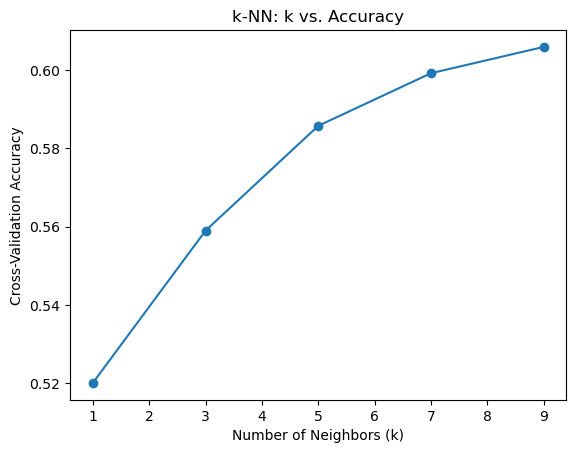

In [42]:
# Convert text to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=50000, sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Test for different k values and use cross-validation to find the best k
k_values = [1, 3, 5, 7, 9]
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine', weights='distance')  # Cosine similarity is often better for text
    scores = cross_val_score(knn, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the best k value
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k}")

# Train the model using the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='cosine', weights='distance')
knn_best.fit(X_train_tfidf, y_train)

# Predict on the test set
knn_pred = knn_best.predict(X_test_tfidf)

# Evaluate the model performance
print("k-NN Classification Report:")
print(classification_report(y_test, knn_pred))

# Plot k vs accuracy
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-NN: k vs. Accuracy')
plt.show()

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



# Parameters for the model
MAX_NB_WORDS = 50000  # maximum number of words to consider
MAX_SEQUENCE_LENGTH = 300  # max length of input sequences (padded)
EMBEDDING_DIM = 100  # word embedding dimensions

# Tokenizing and padding the text data
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

# Convert the target labels to categorical (one-hot encoding)
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

# Build the CNN model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))

# First Convolutional layer
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Second Convolutional layer
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Global Max Pooling
model.add(GlobalMaxPooling1D())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer (softmax for multi-class classification)
model.add(Dense(y_train_cat.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))

# Evaluate the model on the test set
cnn_pred = model.predict(X_test_pad)
y_pred_class = np.argmax(cnn_pred, axis=1)

# Evaluate the model performance
print("CNN Classification Report:")
print(classification_report(y_test, y_pred_class))






Epoch 1/5


688/688 [==============================] - 58s 82ms/step - loss: 1.1692 - accuracy: 0.5582 - val_loss: 1.0635 - val_accuracy: 0.5929
Epoch 2/5
688/688 [==============================] - 60s 87ms/step - loss: 0.9261 - accuracy: 0.6551 - val_loss: 0.9339 - val_accuracy: 0.6578
Epoch 3/5
688/688 [==============================] - 60s 88ms/step - loss: 0.7686 - accuracy: 0.7177 - val_loss: 0.9649 - val_accuracy: 0.6579
Epoch 4/5
688/688 [==============================] - 64s 94ms/step - loss: 0.6433 - accuracy: 0.7683 - val_loss: 1.0686 - val_accuracy: 0.6567
Epoch 5/5
344/344 [==============================] - 4s 11ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       881
           1       0.46      0.37      0.41       657
           2       0.45      0.47      0.46      1026
           3       0.51      0.52      0.51      2048
           4       0.75      0.88      0.81      5555
     

C:\Users\kanis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kanis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kanis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



# Parameters for the model
MAX_NB_WORDS = 50000  # maximum number of words to consider
MAX_SEQUENCE_LENGTH = 300  # max length of input sequences (padded)
EMBEDDING_DIM = 100  # word embedding dimensions

# Tokenizing and padding the text data
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

# Convert the target labels to categorical (one-hot encoding)
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

# Build the LSTM model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))

# Spatial Dropout for preventing overfitting
model.add(SpatialDropout1D(0.2))

# First LSTM layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))

# Second LSTM layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer (softmax for multi-class classification)
model.add(Dense(y_train_cat.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_cat))

# Evaluate the model on the test set
lstm_pred = model.predict(X_test_pad)
y_pred_class = np.argmax(lstm_pred, axis=1)

# Evaluate the model performance
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_class))


Epoch 1/5
688/688 [==============================] - 2216s 3s/step - loss: 1.1465 - accuracy: 0.5785 - val_loss: 1.0062 - val_accuracy: 0.6270
Epoch 2/5
688/688 [==============================] - 3074s 4s/step - loss: 0.9456 - accuracy: 0.6522 - val_loss: 0.9651 - val_accuracy: 0.6482
Epoch 3/5
688/688 [==============================] - 3203s 5s/step - loss: 0.8611 - accuracy: 0.6852 - val_loss: 0.9590 - val_accuracy: 0.6478
Epoch 4/5
688/688 [==============================] - 3437s 5s/step - loss: 0.7944 - accuracy: 0.7124 - val_loss: 1.0035 - val_accuracy: 0.6507
Epoch 5/5
344/344 [==============================] - 43s 125ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.57      0.64       881
           1       0.39      0.34      0.36       657
           2       0.49      0.48      0.48      1026
           3       0.51      0.52      0.51      2048
           4       0.74      0.88      0.80      5555
       

C:\Users\kanis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kanis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kanis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
def evaluate_model(y_true, y_pred, model_name):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Print metrics
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}\n")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

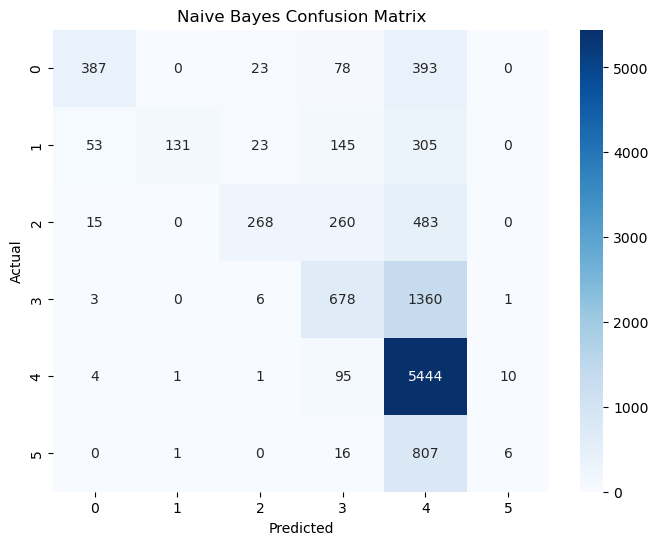


Naive Bayes Evaluation:
Accuracy: 0.6287
Precision: 0.6425
Recall: 0.6287
F1-Score: 0.5636



In [40]:
nb_metrics = evaluate_model(y_test, y_pred_nb, "Naive Bayes")

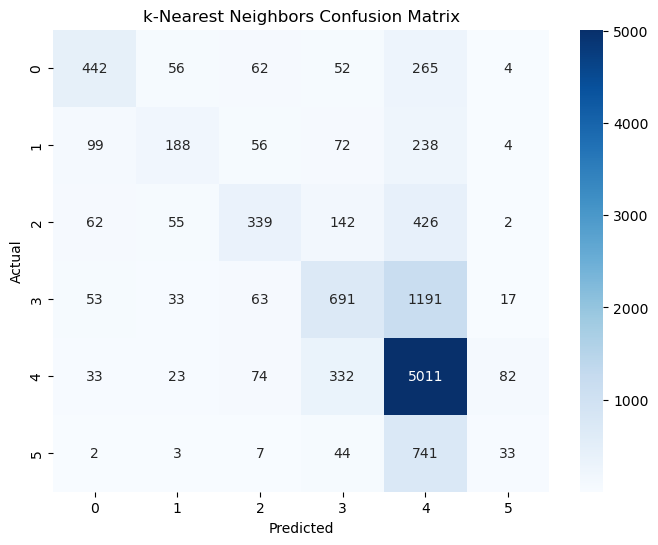


k-Nearest Neighbors Evaluation:
Accuracy: 0.6096
Precision: 0.5709
Recall: 0.6096
F1-Score: 0.5643



In [43]:
knn_metrics = evaluate_model(y_test, knn_pred, "k-Nearest Neighbors")

In [44]:
cnn_metrics = evaluate_model(y_test, cnn_pred, "CNN")

NameError: name 'cnn_pred' is not defined

In [ ]:
lstm_metrics = evaluate_model(y_test, lstm_pred, "LSTM")

In [ ]:
results = pd.DataFrame({
    'Naive Bayes': nb_metrics,
    'k-NN': knn_metrics,
    'CNN': cnn_metrics,
    'LSTM': lstm_metrics
}).T

print("\nModel Comparison:")
print(results)